In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [9]:
dataset = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
dataset.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


# Department wise performances analysis

There are six departments available in employee department. 
- Sales 
- Human Resources 
- Development 
- Data Science 
- Research & Devlopment 
- Finance 

# Sales Department

In [3]:
department_sales = dataset.loc[dataset.EmpDepartment == 'Sales']
department_sales.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
6,E1001016,50,Male,Marketing,Married,Sales,Sales Representative,Travel_Rarely,8,4,...,4,4,2,3,2,2,2,2,No,3


## 1. Performance Rating according to number of employees

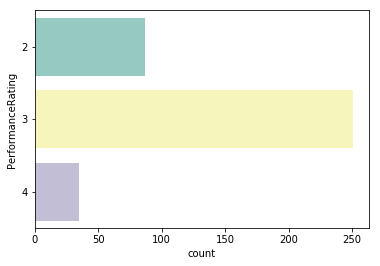

In [4]:
sns.countplot(y="PerformanceRating", data=department_sales, palette="Set3")

## 2.Performance rating acccording to age

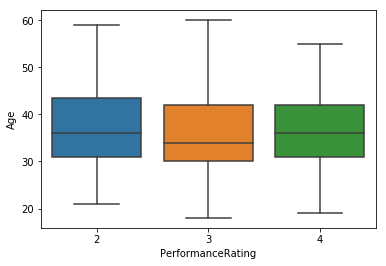

In [5]:
sns.boxplot(department_sales['PerformanceRating'], department_sales['Age'])

## 3.Performance rating acccording to gender

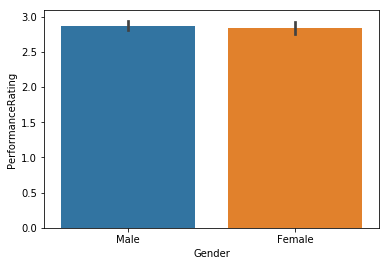

In [6]:
sns.barplot(department_sales['Gender'],department_sales['PerformanceRating'])

# Human Resources Department

In [7]:
department_hr = dataset.loc[dataset.EmpDepartment == 'Human Resources']
department_hr.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
16,E1001038,39,Female,Human Resources,Married,Human Resources,Human Resources,Travel_Rarely,3,3,...,3,12,3,1,8,3,3,6,No,3
58,E1001107,36,Male,Human Resources,Married,Human Resources,Human Resources,Travel_Rarely,13,3,...,2,8,2,3,5,2,0,4,No,3
81,E1001147,28,Male,Medical,Divorced,Human Resources,Human Resources,Travel_Rarely,8,2,...,4,6,6,3,5,1,0,4,No,3
85,E1001156,36,Male,Life Sciences,Married,Human Resources,Human Resources,Travel_Rarely,8,3,...,3,6,3,3,5,4,0,3,No,3


## 1.Performance Rating according to number of employees

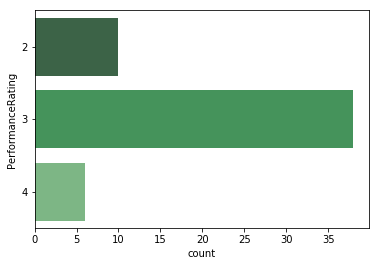

In [30]:
sns.countplot(y="PerformanceRating", data=department_hr, palette="Greens_d");

## 2.Performance Rating according to age

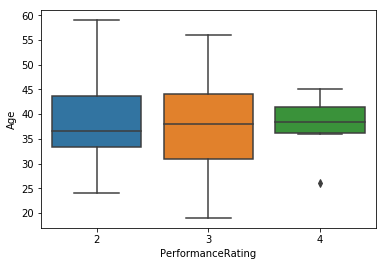

In [10]:
sns.boxplot(department_hr['PerformanceRating'], department_hr['Age'])

## 3.Performance Rating according to gender

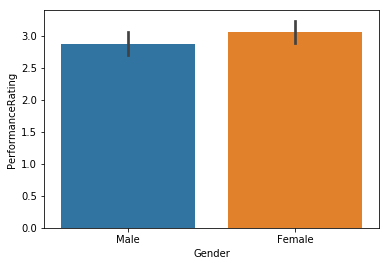

In [33]:
sns.barplot(department_hr['Gender'], department_hr['PerformanceRating'])

# Development Department 

In [41]:
department_dev = dataset.loc[dataset.EmpDepartment == 'Development']
department_dev.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
5,E1001011,27,Male,Life Sciences,Divorced,Development,Developer,Travel_Frequently,10,2,...,3,9,4,2,9,7,1,7,No,4
7,E1001019,28,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,1,2,...,4,10,4,3,7,7,3,7,Yes,3
8,E1001020,36,Female,Life Sciences,Married,Development,Developer,Non-Travel,8,3,...,1,10,2,3,8,7,0,5,No,3
9,E1001021,38,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,1,3,...,4,10,4,4,1,0,0,0,No,3
10,E1001022,44,Male,Medical,Single,Development,Developer,Non-Travel,24,3,...,3,9,5,3,5,2,1,4,No,3


## 1.Performance rating acccording number of employees

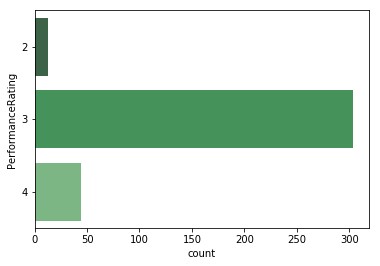

In [42]:
sns.countplot(y="PerformanceRating", data=department_dev, palette="Greens_d");

## 2.Performance rating acccording Age

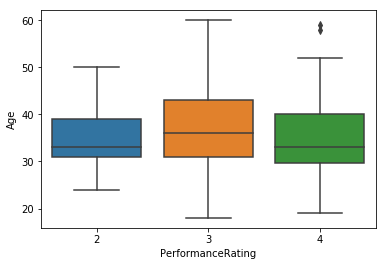

In [43]:
sns.boxplot(department_dev['PerformanceRating'], department_dev['Age'])

## 3.Performance rating according to gender

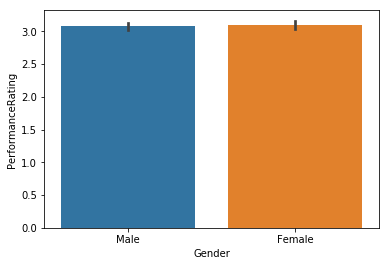

In [44]:
sns.barplot(department_dev['Gender'], department_dev['PerformanceRating'])

# Research and Development Department 

In [12]:
department_rd = dataset.loc[dataset.EmpDepartment == 'Research & Development']
department_rd.head() 

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
156,E1001284,38,Male,Medical,Married,Research & Development,Senior Manager R&D,Travel_Frequently,10,1,...,2,3,0,2,2,1,0,2,No,3
157,E1001288,35,Male,Other,Divorced,Research & Development,Laboratory Technician,Travel_Rarely,14,4,...,4,5,2,1,4,2,0,2,Yes,3
158,E1001289,31,Female,Life Sciences,Married,Research & Development,Manufacturing Director,Travel_Frequently,1,1,...,3,4,1,3,4,3,0,3,No,3
159,E1001290,18,Male,Life Sciences,Single,Research & Development,Research Scientist,Non-Travel,5,2,...,4,0,2,3,0,0,0,0,No,3
160,E1001291,54,Female,Technical Degree,Married,Research & Development,Senior Manager R&D,Travel_Rarely,17,3,...,3,22,2,3,10,7,0,8,No,3


## 1.Performance rating acccording number of employees

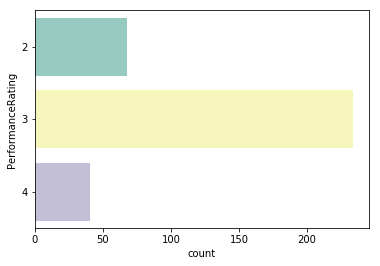

In [13]:
sns.countplot(y="PerformanceRating", data=department_rd, palette="Set3");

## 2.Performance Rating according to Age 

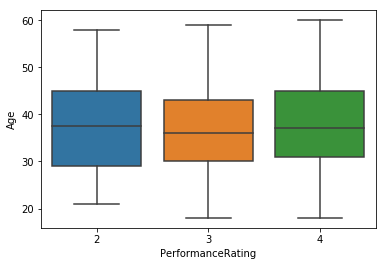

In [38]:
sns.boxplot(department_rd['PerformanceRating'], department_rd['Age'])

## 3.Performance Rating according to gender

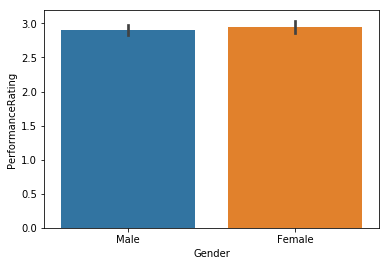

In [39]:
sns.barplot(department_rd['Gender'], department_rd['PerformanceRating'])

# Data Science Department 

In [9]:
department_science = dataset.loc[dataset.EmpDepartment == 'Data Science']
department_science.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
89,E1001165,49,Female,Technical Degree,Married,Data Science,Data Scientist,Travel_Rarely,1,3,...,2,7,2,3,4,2,0,2,No,3
107,E1001201,21,Female,Other,Single,Data Science,Data Scientist,Travel_Rarely,18,1,...,1,1,3,2,1,0,0,0,Yes,3
108,E1001202,36,Male,Life Sciences,Married,Data Science,Data Scientist,Travel_Rarely,14,1,...,1,17,2,2,16,8,4,11,No,3
120,E1001223,48,Male,Medical,Married,Data Science,Data Scientist,Travel_Rarely,20,4,...,1,13,2,2,0,0,0,0,No,3
942,E100574,51,Male,Life Sciences,Married,Data Science,Data Scientist,Travel_Rarely,8,4,...,4,16,5,1,10,9,4,7,No,3


## 1.Performance rating acccording number of employees

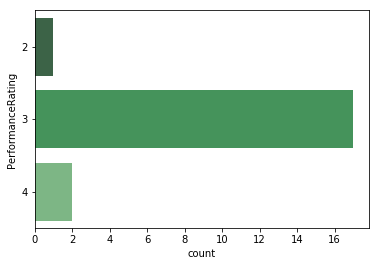

In [10]:
sns.countplot(y="PerformanceRating", data=department_science, palette="Greens_d");

## 2.Performance rating acccording to age

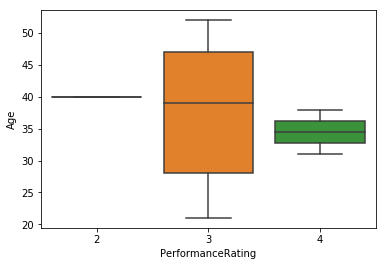

In [11]:
sns.boxplot(department_science['PerformanceRating'], department_science['Age'])

## 3.Performance rating acccording to gender

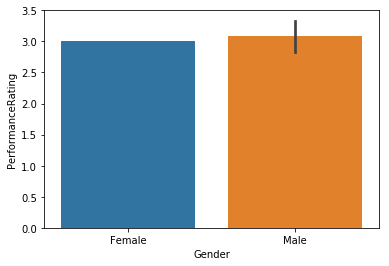

In [12]:
sns.barplot(department_science['Gender'], department_science['PerformanceRating'])

# Development Department

In [13]:
department_dev = dataset.loc[dataset.EmpDepartment == 'Development']
department_dev.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
5,E1001011,27,Male,Life Sciences,Divorced,Development,Developer,Travel_Frequently,10,2,...,3,9,4,2,9,7,1,7,No,4
7,E1001019,28,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,1,2,...,4,10,4,3,7,7,3,7,Yes,3
8,E1001020,36,Female,Life Sciences,Married,Development,Developer,Non-Travel,8,3,...,1,10,2,3,8,7,0,5,No,3
9,E1001021,38,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,1,3,...,4,10,4,4,1,0,0,0,No,3
10,E1001022,44,Male,Medical,Single,Development,Developer,Non-Travel,24,3,...,3,9,5,3,5,2,1,4,No,3


## 1.Performance Rating according to number of employees

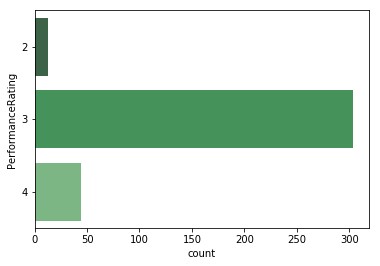

In [14]:
sns.countplot(y="PerformanceRating", data=department_dev, palette="Greens_d");

## 2.Performance rating according to age

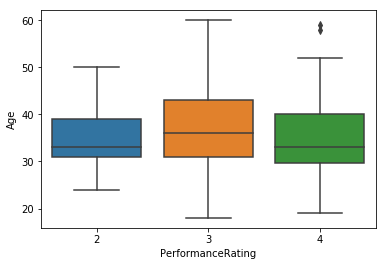

In [15]:
sns.boxplot(department_dev['PerformanceRating'], department_dev['Age'])

## 3.Performance rating according to gender

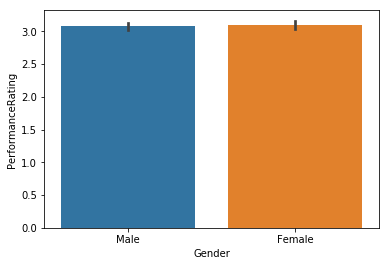

In [16]:
sns.barplot(department_dev['Gender'],department_dev['PerformanceRating'])

# Finance Department 

In [46]:
department_finance = dataset.loc[dataset.EmpDepartment == 'Finance']
department_finance.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
482,E1001868,29,Male,Life Sciences,Divorced,Finance,Finance Manager,Travel_Frequently,2,1,...,4,6,0,4,6,4,1,3,No,2
484,E1001870,23,Male,Technical Degree,Married,Finance,Finance Manager,Travel_Rarely,10,3,...,4,4,2,3,2,2,2,2,No,3
485,E1001874,35,Male,Life Sciences,Married,Finance,Finance Manager,Travel_Rarely,28,3,...,4,10,3,2,10,9,6,8,No,2
486,E1001875,34,Male,Technical Degree,Married,Finance,Finance Manager,Travel_Frequently,10,4,...,2,8,3,2,8,2,7,7,No,3
487,E1001877,43,Male,Technical Degree,Divorced,Finance,Finance Manager,Travel_Rarely,27,3,...,3,8,0,3,6,4,0,2,No,3


## 1.Performance Rating according to number of employees

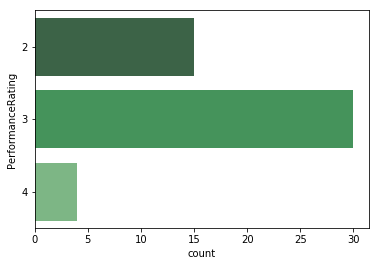

In [47]:
sns.countplot(y="PerformanceRating", data=department_finance, palette="Greens_d");

## 2.Performance Rating according to Age

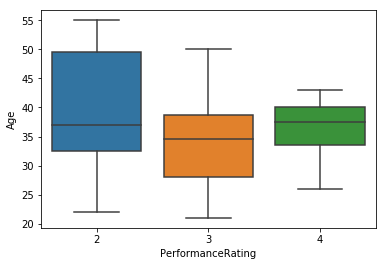

In [48]:
sns.boxplot(department_finance['PerformanceRating'], department_finance['Age'])

## 3.Performance Rating according to gender

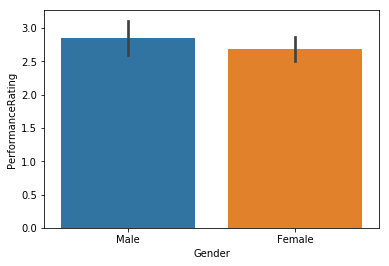

In [49]:
sns.barplot(department_finance['Gender'], department_finance['PerformanceRating'])

# Feature importances via Random Forest

The Random Forest classifier in Sklearn also contains a very convenient and most useful attribute which tells us which features within our dataset has been given most importance through the Random Forest algorithm. The snippet below will retrieve the feature importances from the model and make them into a DataFrame.


In [14]:
#The data that was saved in Data Exploratory Analysis is now imported     
dataset = pd.read_csv('INX_Future_Inc_Employee_Performance_Exploratory.csv')
dataset.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0,3,8,2,10,4,2,...,2,23,2,2,21,6,12,6,0,3
4,60,1,2,2,5,13,2,16,4,1,...,4,10,1,3,2,2,2,2,0,3


## Splitting Data into Train and Test set

In [15]:
#Setting the target and the predictors variable
X = dataset.iloc[:,0:-1]
#X=dataset[col1[0:26]]# Predictors variable
y = dataset.PerformanceRating # Target Performance Rating 
#Split data into train and test sets as well as for validation and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=11)

In [16]:
cls = RandomForestClassifier() ## This line instantiates the model. 
cls.fit(X_train, y_train) ## Fit the model on your training data.

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
feature_importances = pd.DataFrame(cls.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
EmpEnvironmentSatisfaction,0.236982
EmpLastSalaryHikePercent,0.216113
YearsSinceLastPromotion,0.100404
EmpDepartment,0.050299
ExperienceYearsInCurrentRole,0.045744
EmpJobRole,0.040107
EmpHourlyRate,0.027739
Age,0.025962
TotalWorkExperienceInYears,0.023527
YearsWithCurrManager,0.022479


# Feature Importance with Gradient Boosting

We can get the feature importance of each feature by using the feature importance property of the model. Ensembles of decision tree methods like gradient boosting can automatically provide estimates of feature importance from a trained predictive model. Feature importance gives a score for each feature of our data. The higher the score more important or relevant is the feature towards our output variable. we use Extra Tree Classifier for extracting the top 3 features for the dataset.

[0.02577452 0.01824481 0.02250197 0.01779544 0.0475751  0.03026748
 0.02209486 0.02958767 0.02890212 0.15355412 0.03064516 0.02113761
 0.02591954 0.02727599 0.02578868 0.0156411  0.15493371 0.02344461
 0.02276737 0.02848813 0.03010193 0.03634311 0.04430414 0.07311453
 0.03316215 0.01063411]


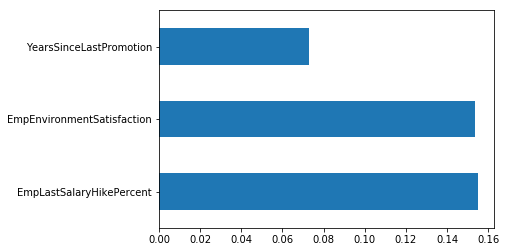

In [18]:
import pandas as pd
import numpy as np
X = dataset.iloc[:,0:-1]  #independent columns
y = dataset.PerformanceRating    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(3).plot(kind='barh')
plt.show()

## Most  important features : Employee salary hike ,Employment environment satisfaction years since last promotion

In [20]:
#Saving the data
dataset.to_csv('INX_Future_Inc_Employee_Performance_Exploratory.csv',index=False)
